<a href="https://colab.research.google.com/github/batmanvane/WPA/blob/main/illustrationEmpiricUncertaintyScenarioAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

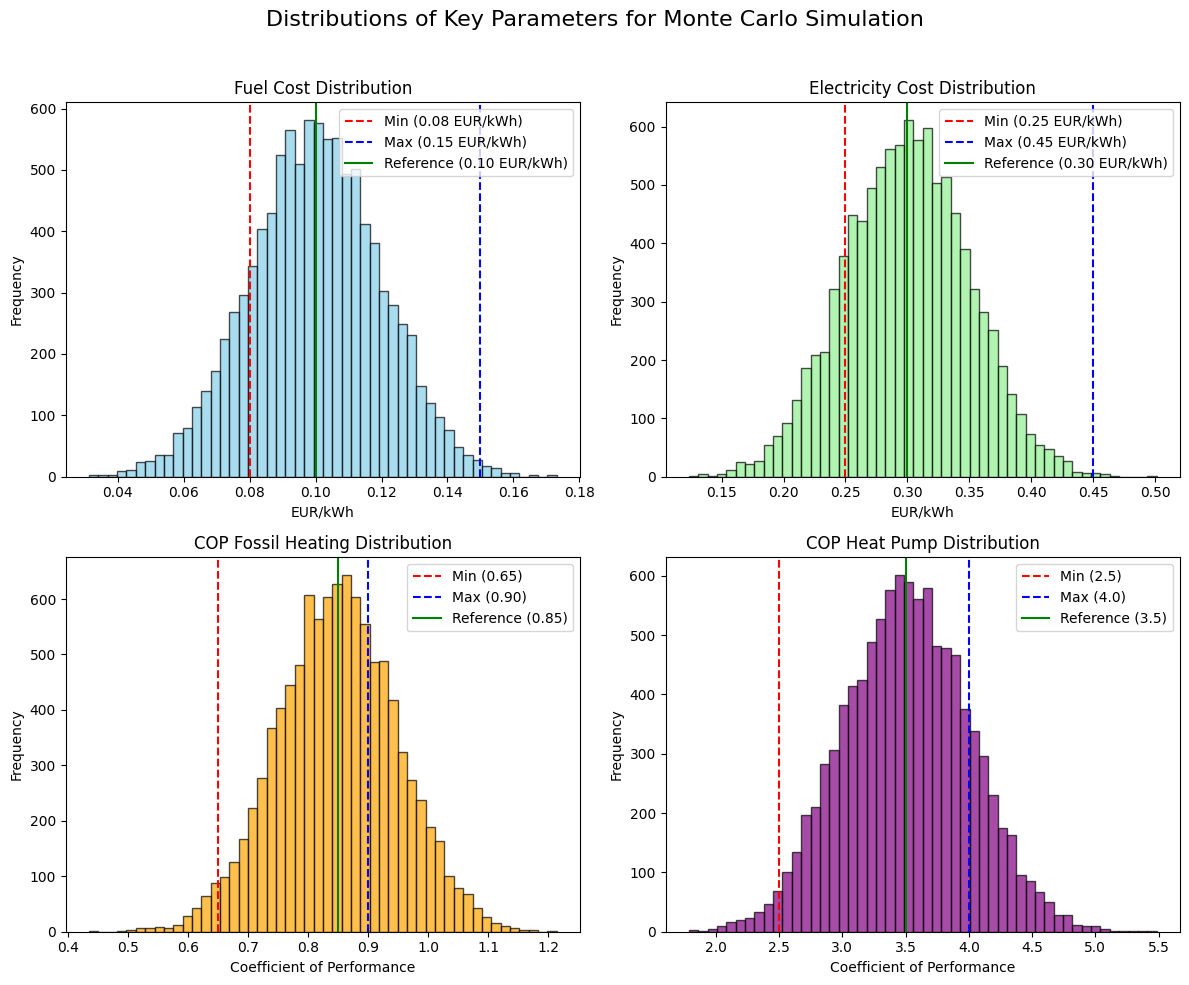

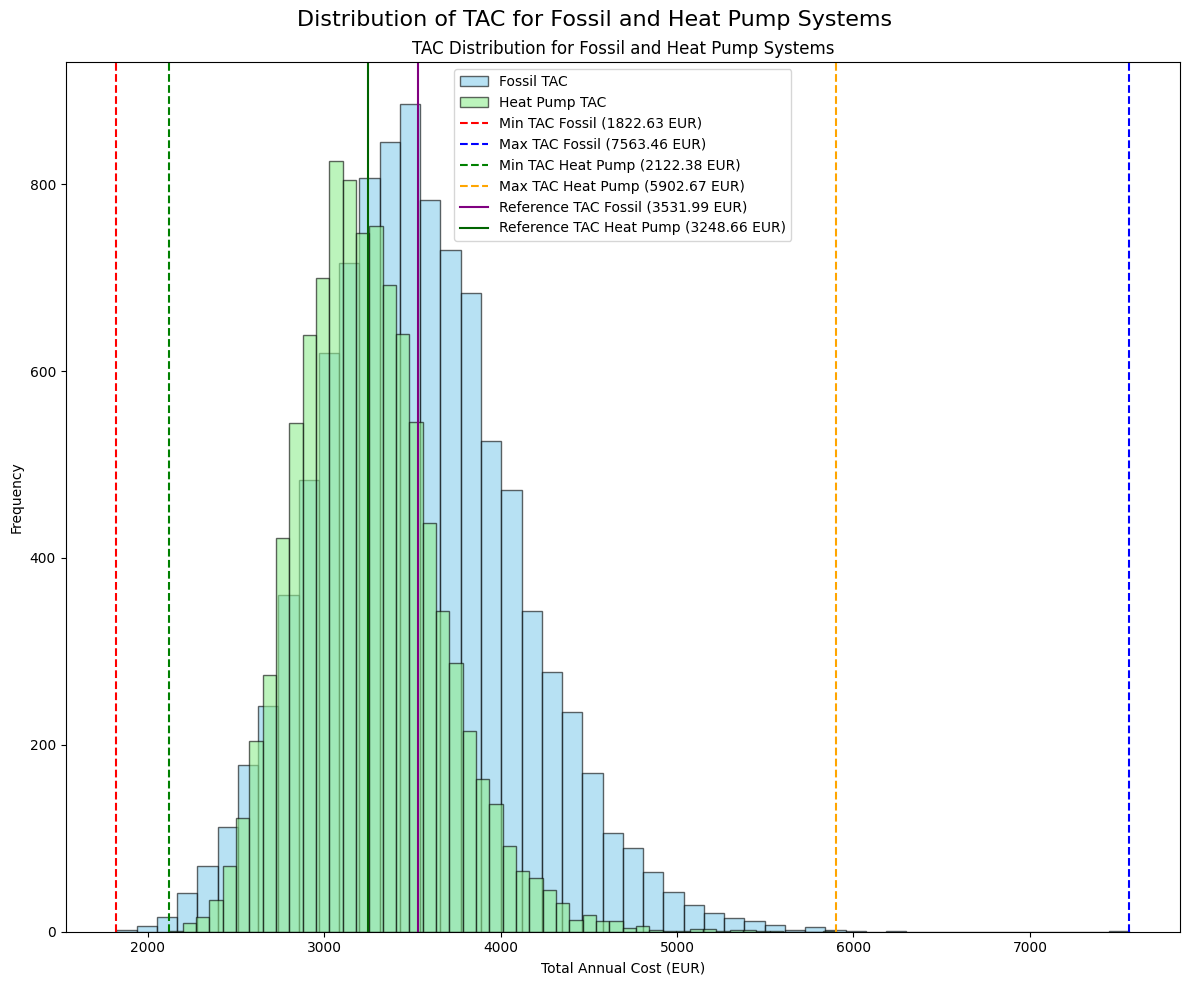

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#Author: Robert Flassig
#Last Update: Jan-28-2025

# Monte Carlo Simulation Parameters
num_samples = 10000

# Distributions for Monte Carlo Simulation
fuel_cost = np.random.normal(0.10, 0.02, num_samples)  # EUR/kWh
electricity_cost = np.random.normal(0.30, 0.05, num_samples)  # EUR/kWh
cop_fossil = np.random.normal(0.85, 0.10, num_samples)
cop_heat_pump = np.random.normal(3.5, 0.5, num_samples)

# Heating demand and other constants
heating_demand = 20000  # kWh/year
maintenance_fossil = 500  # EUR/year
maintenance_heat_pump = 300  # EUR/year
install_fossil = 8000  # EUR
install_heat_pump = 15000  # EUR
discount_rate = 0.05
lifetime = 20

# Reference parameters
ref_fuel_cost = 0.10
ref_electricity_cost = 0.30
ref_cop_fossil = 0.85
ref_cop_heat_pump = 3.5

# Annualized cost calculation function
def annualized_cost(investment, rate, years):
    return (investment * rate) / (1 - (1 + rate) ** -years)

# Annualized costs
annualized_cost_fossil = annualized_cost(install_fossil, discount_rate, lifetime)
annualized_cost_heat_pump = annualized_cost(install_heat_pump, discount_rate, lifetime)

# TAC Calculation
energy_cost_fossil = (heating_demand / cop_fossil) * fuel_cost
energy_cost_heat_pump = (heating_demand / cop_heat_pump) * electricity_cost

tac_fossil = energy_cost_fossil + maintenance_fossil + annualized_cost_fossil
tac_heat_pump = energy_cost_heat_pump + maintenance_heat_pump + annualized_cost_heat_pump

# Parameter distributions with min-max indicators
# Creating subplots for the 4 parameter distributions (Fuel Cost, Electricity Cost, COP Fossil, COP Heat Pump)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Distributions of Key Parameters for Monte Carlo Simulation", fontsize=16)

# Plotting each parameter's histogram
axes[0, 0].hist(fuel_cost, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].axvline(0.08, color='red', linestyle='--', label='Min (0.08 EUR/kWh)')
axes[0, 0].axvline(0.15, color='blue', linestyle='--', label='Max (0.15 EUR/kWh)')
axes[0, 0].axvline(ref_fuel_cost, color='green', linestyle='-', label='Reference (0.10 EUR/kWh)')
axes[0, 0].set_title("Fuel Cost Distribution")
axes[0, 0].set_xlabel("EUR/kWh")
axes[0, 0].set_ylabel("Frequency")
axes[0, 0].legend()

axes[0, 1].hist(electricity_cost, bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 1].axvline(0.25, color='red', linestyle='--', label='Min (0.25 EUR/kWh)')
axes[0, 1].axvline(0.45, color='blue', linestyle='--', label='Max (0.45 EUR/kWh)')
axes[0, 1].axvline(ref_electricity_cost, color='green', linestyle='-', label='Reference (0.30 EUR/kWh)')
axes[0, 1].set_title("Electricity Cost Distribution")
axes[0, 1].set_xlabel("EUR/kWh")
axes[0, 1].set_ylabel("Frequency")
axes[0, 1].legend()

axes[1, 0].hist(cop_fossil, bins=50, alpha=0.7, color='orange', edgecolor='black')
axes[1, 0].axvline(0.65, color='red', linestyle='--', label='Min (0.65)')
axes[1, 0].axvline(0.90, color='blue', linestyle='--', label='Max (0.90)')
axes[1, 0].axvline(ref_cop_fossil, color='green', linestyle='-', label='Reference (0.85)')
axes[1, 0].set_title("COP Fossil Heating Distribution")
axes[1, 0].set_xlabel("Coefficient of Performance")
axes[1, 0].set_ylabel("Frequency")
axes[1, 0].legend()

axes[1, 1].hist(cop_heat_pump, bins=50, alpha=0.7, color='purple', edgecolor='black')
axes[1, 1].axvline(2.5, color='red', linestyle='--', label='Min (2.5)')
axes[1, 1].axvline(4.0, color='blue', linestyle='--', label='Max (4.0)')
axes[1, 1].axvline(ref_cop_heat_pump, color='green', linestyle='-', label='Reference (3.5)')
axes[1, 1].set_title("COP Heat Pump Distribution")
axes[1, 1].set_xlabel("Coefficient of Performance")
axes[1, 1].set_ylabel("Frequency")
axes[1, 1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Plot distributions of TAC
fig, ax = plt.subplots(figsize=(12, 10))
fig.suptitle("Distribution of TAC for Fossil and Heat Pump Systems", fontsize=16)

# TAC distribution
ax.hist(tac_fossil, bins=50, alpha=0.6, label="Fossil TAC", color='skyblue', edgecolor='black')
ax.hist(tac_heat_pump, bins=50, alpha=0.6, label="Heat Pump TAC", color='lightgreen', edgecolor='black')
ax.axvline(tac_fossil.min(), color='red', linestyle='--', label=f'Min TAC Fossil ({tac_fossil.min():.2f} EUR)')
ax.axvline(tac_fossil.max(), color='blue', linestyle='--', label=f'Max TAC Fossil ({tac_fossil.max():.2f} EUR)')
ax.axvline(tac_heat_pump.min(), color='green', linestyle='--', label=f'Min TAC Heat Pump ({tac_heat_pump.min():.2f} EUR)')
ax.axvline(tac_heat_pump.max(), color='orange', linestyle='--', label=f'Max TAC Heat Pump ({tac_heat_pump.max():.2f} EUR)')
ax.axvline(tac_fossil.mean(), color='purple', linestyle='-', label=f'Reference TAC Fossil ({tac_fossil.mean():.2f} EUR)')
ax.axvline(tac_heat_pump.mean(), color='darkgreen', linestyle='-', label=f'Reference TAC Heat Pump ({tac_heat_pump.mean():.2f} EUR)')
ax.set_title('TAC Distribution for Fossil and Heat Pump Systems')
ax.set_xlabel('Total Annual Cost (EUR)')
ax.set_ylabel('Frequency')
ax.legend()

plt.tight_layout()
plt.show()
